## Bases de datos y SQL

En este notebook se procesarán los datasets de varios .csv para ganar en funcionalidad y coherencia. El objetivo es construir una estructura relacional de datos para, posteriormente, poder realizar consultas en SQL y retornar información óptima.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Cargamos todas las tablas en diferentes DataFrames.
r1 = "actor.csv"
r2 = "category.csv"
r3 = "film.csv"
r4 = "inventory.csv"
r5 = "language.csv"
r6 = "old_HDD.csv"
r7 = "rental.csv"

actor = pd.read_csv('data/'+r1)
category = pd.read_csv('data/'+r2)
film = pd.read_csv('data/'+r3)
inventory = pd.read_csv('data/'+r4)
language= pd.read_csv('data/'+r5)
old_HDD = pd.read_csv('data/'+r6)
rental = pd.read_csv('data/'+r7)


In [23]:
#Eliminamos las columnas 'last_update' y 'original_language_id' ya que consideramos que son inservibles.
tablas = [actor,category,film,inventory,language,old_HDD,rental]

for tabla in tablas:
        if 'last_update' in tabla:
            tabla.drop(columns=['last_update'], inplace=True)
    
        if 'original_language_id' in tabla:
            tabla.drop(columns=['original_language_id'], inplace=True)

In [24]:
inventory.head(10)
#Aquí vemos que por cada titulo nos indica en que tienda está
#y le asigna un valor a inventory_id que luego no utiliza o está desactualizado.

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2
5,6,1,2
6,7,1,2
7,8,1,2
8,9,2,2
9,10,2,2


In [25]:
#Vamos a crear una nueva tabla que nos indique la cantidad de peliculas en cada una de las tiendas.
inv_film = inventory.groupby('film_id')['store_id'].value_counts().reset_index(name='qty')

inv_film.head(10)
#Ejemplo. La pelicula 'film_id = 4' hay 4 copias en la tienda 1 y 3 en la tienda 2.

,film_id,store_id,qty
0,1,1,4
1,1,2,4
2,2,2,3
3,3,2,4
4,4,1,4
5,4,2,3
6,5,2,3
7,6,1,3
8,6,2,3
9,7,2,3


In [27]:
#Para ganar en operatitividad a la hora de relacionar las tablas decidimos implementar el 'actor_id' de la tabla actor a la tabla 'odd_HDD'
#Primer paso: Construir una columna uniendo el first_name + last_name

actor["full_name"] = actor[["first_name", "last_name"]].apply(" ".join, axis=1) 
actor.head(3)


,actor_id,first_name,last_name,full_name
0,1,PENELOPE,GUINESS,PENELOPE GUINESS
1,2,NICK,WAHLBERG,NICK WAHLBERG
2,3,ED,CHASE,ED CHASE


In [29]:
#Vamos a modificar la tabla old_HDD y construímos otra columna con nombre y apellido. Pero ésta vez la llamaremos actor_id(Luego veréis el porque)

old_HDD["actor_id"] = old_HDD[["first_name", "last_name"]].apply(" ".join, axis=1) 
old_HDD.head(3)


,first_name,last_name,title,release_year,category_id,actor_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6,PENELOPE GUINESS
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2,PENELOPE GUINESS
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13,PENELOPE GUINESS


In [ ]:
def add_code(key: pd.Series, value: pd.Series, repl: pd.DataFrame, column: str ):
    '''
    Esta función produce un diccionario temporal con las keys y los values de series escogidas y sustituye, por esos values, los datos
    en un DataFrame que localiza a través de la key del diccionario :)'''
    
    dictio = dict(zip(key, value))
    for i in dictio.keys():
        repl.replace({column : i}, dictio[i], inplace=True)

In [30]:
#Utilizando la comparación de 'full_name' con 'actor_id' conseguimos crear una conexión entre las 2 tablas. 
#Seguidamente sustituiremos el actor_id por el codigo numérico correspondiente.

dictio = dict(zip(actor.full_name, actor.actor_id))
for i in dictio.keys():
    old_HDD.replace({"actor_id" : i}, dictio[i], inplace=True)
    
#Pongo un head largo porque a Penélope está claro que le gustán los focos.
old_HDD.head(20)

,first_name,last_name,title,release_year,category_id,actor_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6,1
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2,1
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13,1
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10,1
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14,1
5,PENELOPE,GUINESS,COLOR PHILADELPHIA,2006,4,1
6,PENELOPE,GUINESS,ELEPHANT TROJAN,2006,11,1
7,PENELOPE,GUINESS,GLEAMING JAWBREAKER,2006,15,1
8,PENELOPE,GUINESS,HUMAN GRAFFITI,2006,10,1
9,PENELOPE,GUINESS,KING EVOLUTION,2006,8,1


In [31]:
#Como tenemos el mismo código de 'actor_id'  tanto en 'actor' 'como en old_HDD' 
# ya no nos hace falta el 'first_name' y el 'last_name' de la tabla 'old_HDD' al igual que el 'full_name' antes creado.
#Y ya que estamos borramos 'release_date' que nos aporta poco ya que los valores están todos repetidos.
#Si querémos saber el nombre de un actor solo habrá que verlo en la tabla actor.

col_del =['first_name','last_name','release_year']

old_HDD.drop(columns=col_del, inplace=True)
old_HDD.head(3)

,title,category_id,actor_id
0,ACADEMY DINOSAUR,6,1
1,ANACONDA CONFESSIONS,2,1
2,ANGELS LIFE,13,1


In [32]:
#borramos la columna 'full_name' de actor.

actor.drop(columns='full_name', inplace=True)
actor.head(3)

,actor_id,first_name,last_name
0,1,PENELOPE,GUINESS
1,2,NICK,WAHLBERG
2,3,ED,CHASE


In [33]:
#Creamos una tabla llamada emp para especificar el id de los empleados y a que tiendan pertenecen. 
#Añadiremos un tercer empleado para que se vea la diferencia.

emp = pd.DataFrame()

empleados = 1,2
tiendas = 1,2
country = 'Barcelona','Madrid'
names = 'Jorge','Diego'

emp['staff_id'] = empleados
emp['store_id'] = tiendas
emp['store'] = country
emp['name'] = names

emp

,staff_id,store_id,store,name
0,1,1,Barcelona,Jorge
1,2,2,Madrid,Diego


In [34]:
# Si queremos contratar a un nuevo empleado sería de la siguiente manera:
nueva_fila = { 'staff_id': 3, 'store_id': 1,'store': 'Barcelona','name':'Dani'} # creamos un diccionario
emp = emp.append(nueva_fila, ignore_index=True)

#Así quedaría:
emp

C:\Users\jorge\AppData\Local\Temp\ipykernel_10736\1922176999.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emp = emp.append(nueva_fila, ignore_index=True)


,staff_id,store_id,store,name
0,1,1,Barcelona,Jorge
1,2,2,Madrid,Diego
2,3,1,Barcelona,Dani


In [35]:
#Hemos comprobado que la columna 'inventory_id' no aporta ninguna información; no está relacionada con la tabla Inventory. 
#Por lo tanto, decidimos eliminarla junto a la columna 'last_update'. Pensamos que sería útil tener disposición de un 'film_id'; lo añadimos. 
#Preparamos la tabla para uso futuro de una forma que nos parece funcional."

rental1 = rental.copy() 
#hacemos una copia que será la nueva tabla.

In [36]:
#limpiamos el nuevo data frame.Y añadimos nuevas columnas para que los proximos valores, tengan ya conexiones con otras tablas.(Como por ejemplo store_id)
rental1.drop(index=list(range(len(rental1))), inplace=True) 
rental1['store_id'] =[]

In [37]:
rental1

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id


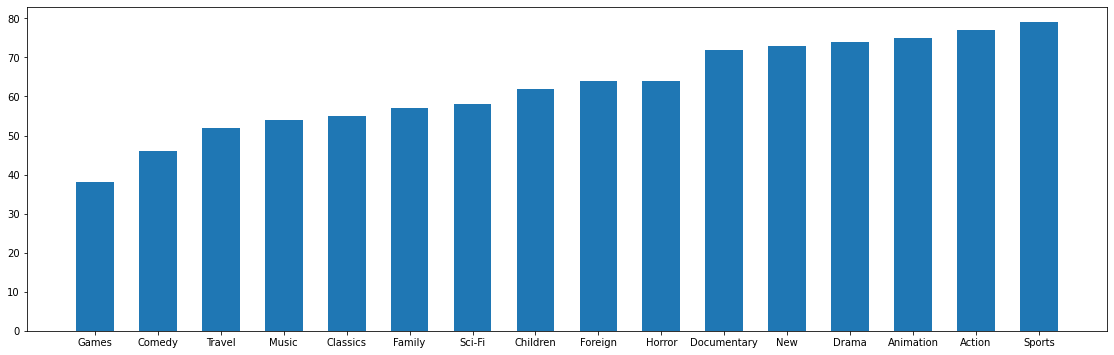

In [38]:
#Ahora probaremos a hacer un grafico con por ejemplo la columna category. 
#Para que la representación gráfica sea explítica tenemos que conseguir que el eje de las x nos muestre el nombre de la categoria, 
#por ello hacemos dos diccionarios y una sustitución:
valor = dict(old_HDD.category_id.value_counts())
categoria = dict(zip(category.category_id, category.name))
#sustituimos con un bucle:
for k in categoria.keys(): valor[categoria[k]] = valor.pop(k)
#ordenamos el diccionario segun valor:
valor = sorted(valor.items(), key=lambda x: x[1], reverse=False)
valor = dict(valor)

#Representamos el gráfico:

fig = plt.figure(figsize = (15,9))
ax = fig.add_axes([0,0,1,0.5])
ax.bar(valor.keys(), valor.values(), width=0.6);

#En el podemos contemplar la distribución según categoría de película que tiene el videoclub:

In [39]:
#Por último guardaremos todas las tablas.
emp.to_csv('data/BBDD/emp.csv', index=False)
rental.to_csv('data/BBDD/rental.csv', index=False)
rental1.to_csv('data/BBDD/rental_new.csv', index=False)
language.to_csv('data/BBDD/language.csv', index=False)
actor.to_csv('data/BBDD/actor.csv', index=False)
category.to_csv('data/BBDD/category.csv', index=False)
film.to_csv('data/BBDD/film.csv', index=False)
inventory.to_csv('data/BBDD/inventory.csv', index=False)
old_HDD.to_csv('data/BBDD/old_HDD.csv', index=False)
inv_film.to_csv('data/BBDD/inv_film.csv', index=False)

El siguiente punto será el de realizar las consultas apropiadas a nuestros intereses en MySQL. Estas consultas están registradas en el archivo **Queries.txt**.